# Intro to Machine learning

If you're viewing this in Github you can open the [notebook in Google Colab](https://colab.research.google.com/github/sagecodes/intro-machine-learning-python/blob/main/Intro_to_Machine_Learning_with_Python.ipynb) to run in your browser.


## Setup

- Google Account
- Save a copy `file > save a copy in drive`

Other useful links:
- [GitHub](https://github.com/sagecodes/intro-machine-learning-python)
- [Slack channel](https://slack.flyte.org/) say hello in introductions
- [Sage Elliott's LinkedIn](https://www.linkedin.com/in/sageelliott/)


## Quick Note on Google Colab

Colab is essentially Google's way of hosting a jupyter notebook. A very popular tool to use as a data scientist!

It allows us to write code, documentation, and output visuals all in one place.

To be able to and edit the code in this workshop. Please make a copy for yourself

`file > save a copy in drive`

## Code Cells
Below is a code cell. There is nothing in it right now.

To run a code cell click on it and then click the play button. Or press `shift+enter`

You can add new code cells by clicking the ` + Code ` button above







In [2]:
print("Hello, world!")

Hello, world!


# Import Data

Data is what drives all machine learning models!

In [3]:
# Import iris dataset from scikit learn
from sklearn.datasets import load_iris
iris = load_iris()

Always take a quick look at your data to make sure its what you're expecting!

In [ ]:
# Print out raw dataset
iris

In [5]:
#150 rows (samples) 4 columns (features: Height & Width of Pedals & Sepals)
print(iris.data.shape)

(150, 4)


In [6]:
# target (label) Shape
print(iris.target.shape)

(150,)


Reading in your own data

In [ ]:
## Import your own data
# iris_df = pd.read_csv('../datasets/iris/iris.csv')

# Explore the dataset

Exploratory Data Analysis (EDA) is a common part of machine learning

We'll use:
- pandas - dataframe
- matplotlib - Visualization
- seaborn - Visualization




In [91]:
#import Pandas
import pandas as pd

# Set to show all columns in dataframe
pd.set_option("display.max_columns", None)

In [8]:
# Make a Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [11]:
# returns first 5 rows(default)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create a full Data frame

If our labels were already in a CSV we imported we wouldn't have to concat like this

In [12]:
import numpy as np

In [13]:
#create dataframe with Pandas & numpy
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [14]:

## prints the last 10 rows
# df.tail(10)

# Change settings to display all of our rows.

df

# pd.options.display.max_rows = 200
# df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

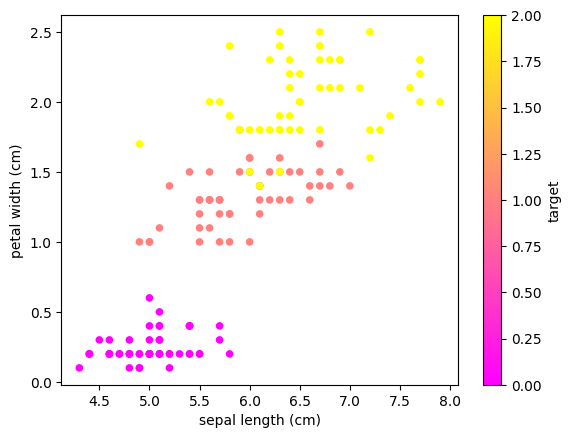

In [15]:
df.plot(kind='scatter', x = 'sepal length (cm)', y = 'petal width (cm)', c='target', cmap=('spring'))

In [16]:
# import seaborn for Pairplot
import seaborn as sns


Create a pair plot

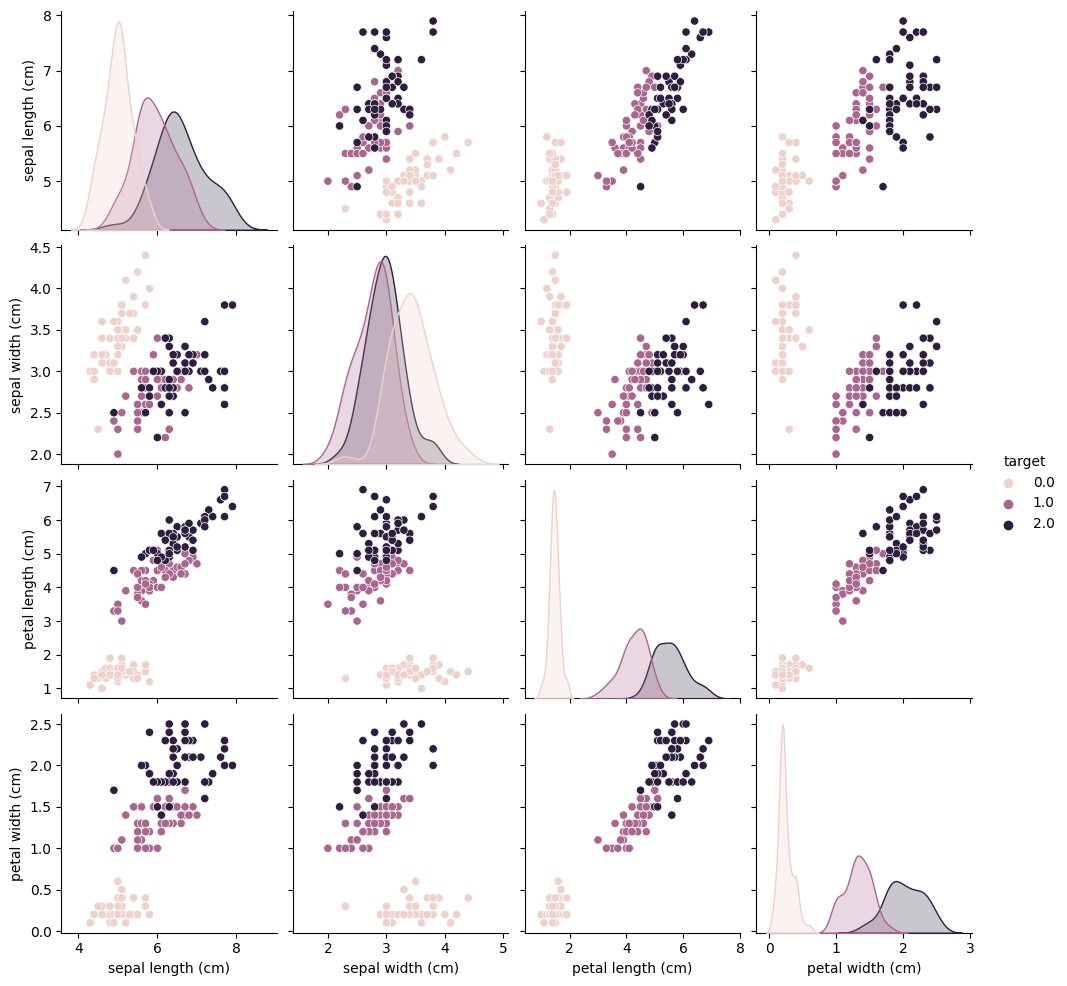

In [18]:
sns.pairplot(df, hue = 'target')

we can customize which features we want to plot. Sometimes you may have 100+



In [19]:
# I use .head(1) sometimes if i forget what column names are
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0


In [ ]:
sns.pairplot(df, hue = 'target', vars = ['sepal length (cm)',
                                            'sepal width (cm)',
                                            'petal length (cm)',
                                            'petal width (cm)' ])

<ipython-input-25-d1b06f473a78>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('spring', 3))


Text(0, 0.5, 'petal width (cm)')

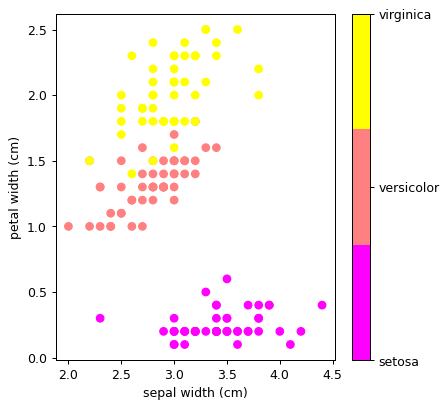

In [25]:
# We wont cover everything happening in depth in the cell
# Read more about matplotlib at https://matplotlib.org/
import matplotlib.pyplot as plt

# choose x & y index values.
# Remember our list looks like this
# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']

# 0 = sepal length (cm)
# 3 = petal width (cm)
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
# Look up lambda functions in python, they're neat!
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


# figsize: changes size of chart (Width, Height)
# dpi: Dots per inch
plt.figure( figsize=(5, 5), dpi=90)

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('spring', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

Seaborn is awesome! Read more about its feature [here](https://seaborn.pydata.org/).

# Train a Model - The Machine Learning Part!


Now that we have our data imported and in a state where we think its good for training a model



#### Training & Testing the Model

- Train Set
- Test Set


In [26]:
# import model & train test split from sklearn
from sklearn import neighbors
from sklearn.model_selection import train_test_split

# Assign Data and labels to x & y values
x = iris.data
y = iris.target

# create the test / training data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    stratify=y)


knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# Train model on training data set
knn.fit(x_train, y_train)

# Predict the labels on test data sset
y_pred = knn.predict(x_test)


You just trained a machine learning model!

In [27]:
# Print the list of predictions
print("Test Predictions (from model): \n {}".format(y_pred))
print("True Values (from dataset): \n {}".format(y_test))

Test Predictions (from model): 
 [1 0 0 1 2 2 0 1 0 2 2 2 0 1 0 0 1 1 0 2 1 0 2 2 2 1 2 1 2 0]
True Values (from dataset): 
 [1 0 0 1 2 2 0 1 0 2 2 2 0 1 0 0 1 1 0 2 1 0 2 2 1 1 2 1 2 0]


In [28]:
# Print accuracy
knn.score(x_test, y_test)

0.9666666666666667

In [29]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# L
# a
# b
# e
# l
##### Predictced

cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

<Axes: >

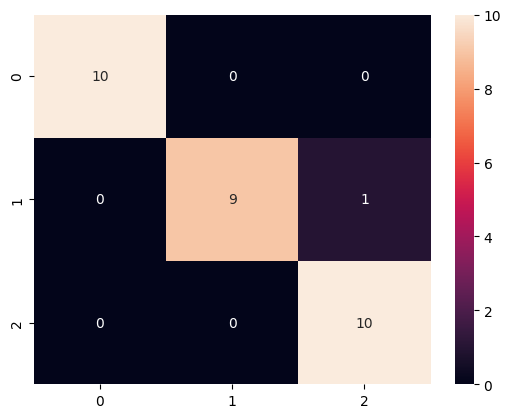

In [30]:
sns.heatmap(cm, annot = True)

Sometimes accuracy isn't the best measurment for success!

[Precision](https://en.wikipedia.org/wiki/Precision_and_recall)

[Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

[F1 score](https://en.wikipedia.org/wiki/F1_score)



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Try our model on new data!

In [35]:
# 0 = setosa' 1 = 'versicolor' 2 = 'virginica']
flower_types = ['setosa','versicolor','virginica']


def knn_predict(features):

  result = knn.predict([features])
  pred_class = flower_types[int(result)]
  pred_proba= knn.predict_proba([features])

  print(result)
  print(pred_class)
  print(pred_proba)


In [80]:
knn_predict([3.1, 2.5, 5.4, .2])

[2]
virginica
[[0. 0. 1.]]


In [81]:
knn_predict([6, 20, -1, 8])

[0]
setosa
[[1. 0. 0.]]


In [82]:
knn_predict([0, 0, 0, 0])

[0]
setosa
[[1. 0. 0.]]


What happens when we put the data way out of bounds from the training data?


![](https://github.com/sagecodes/intro-machine-learning/raw/master/irisknn.png)

# Linear Regression Model

We're going to do similar steps like we did for the kNN model, but we'll be using a different model to predict a linear number instead of a class!

Coefficients: [998.57768914]
Mean squared error: 4061.8259284949268


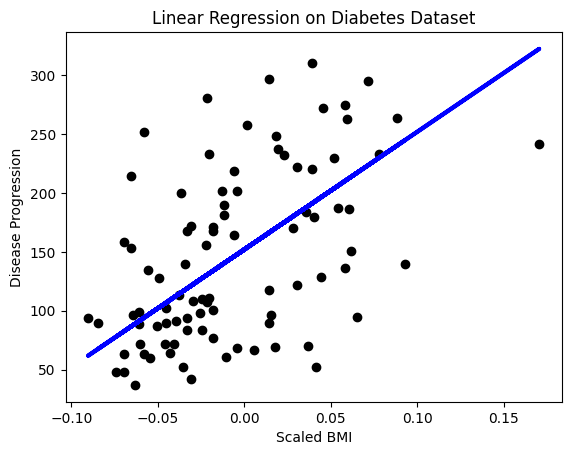

In [87]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature for simplicity
X = diabetes.data[:, np.newaxis, 2]  # Using just the third feature (scaled BMI)
y = diabetes.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Create a linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Output coefficients and mean squared error
print(f'Coefficients: {regr.coef_}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

# Plot the data and the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('Scaled BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression on Diabetes Dataset')

plt.show()


Another example of linear regression with some synthetic data that fits a line a bit better

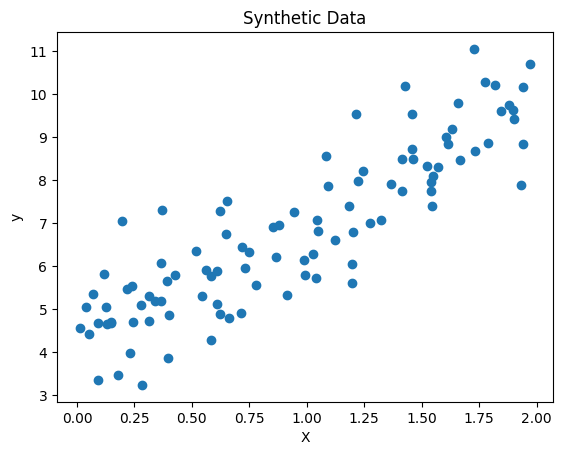

Intercept: [4.21509616]
Coefficient: [[2.77011339]]
Mean Squared Error: 0.8065845639670531


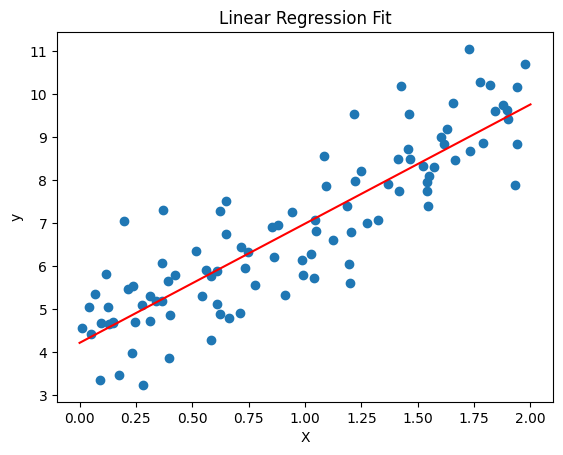

In [89]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # Importing the MSE function

# Create synthetic data
np.random.seed(42)  # for reproducibility
X = 2 * np.random.rand(100, 1)  # Random dataset of 100 points
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some Gaussian noise

# Plot the synthetic data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

# Create a Linear Regression model and fit it to the data
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Display the learned parameters
print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficient: {lin_reg.coef_}")

# Make predictions on the original data
y_pred = lin_reg.predict(X)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Make predictions for new data points
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Plot the model's predictions
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()


What could improve our prediction?

- More data
- Feature engineering
- parameter tuning
- different model



# Keep Learning!
We made it through this quick intro to machine learning!

There is SO much more to learn about data science and machine learning. We really only scratched the surafce here!

Read more about Feature Engineering, Model Selection, Model Tuning.

Best way to learn is solving a problem you're excited about!


## Stay connected

https://www.linkedin.com/in/sageelliott/

- [Upcoming Events](https://www.meetup.com/ai-builders-and-learners-seattle/)
- [Union AI Blog](https://www.union.ai/resources)
- [Flyte GitHub](https://github.com/flyteorg/flyte)
- [AI Slack group](https://slack.flyte.org/)





